# Fitting a Line to Data (part 1)
This is seemingly the most simple thing one can do in the realm of comparing our understanding of the world to data that the world produces. However, don't be fooled. To really understand this process is a rabbit hole. If you don't believe how this could be possible, please check out <a href="https://arxiv.org/pdf/1008.4686v1.pdf">this fantastic paper</a> written by a hero of mine, Dave Hogg, at NYU. 

We will take a Bayesian approach to this problem, and you may not even know what that means yet. But don't fret. It is much more intuitive than any bit of statistics I have ever learned. The task at hand is to read in some data and then find the best estimate for the parameters of a line (slope and intercept) given the data. But more importantly, we'd like to find the probability distributions of those parameters since that will inform us how much we should believe our answer.

Let's get started.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

First things first, let's load and look at the data.

Text(0, 0.5, 'Y values')

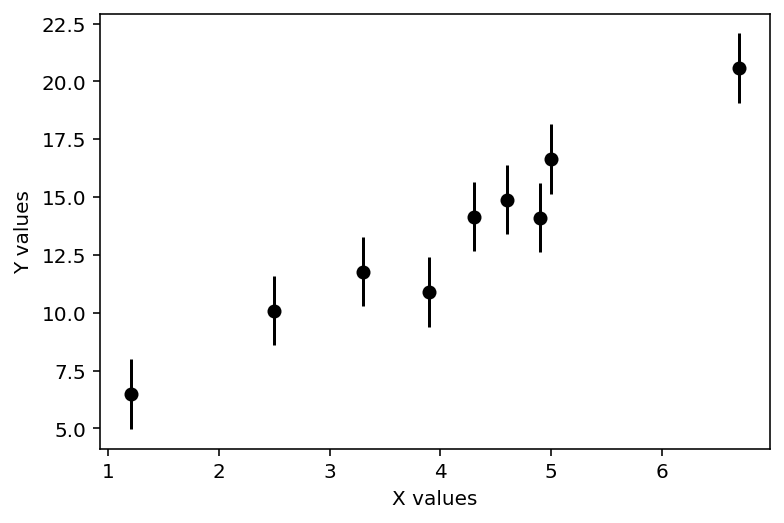

In [2]:
# xvals, yvals, yerror
xvals,yvals,yerror = np.loadtxt('line_data.txt',unpack=True)

# plot up data with errorbars
plt.errorbar(xvals,yvals,yerr=yerror,fmt='o',color='black')
plt.xlabel('X values')
plt.ylabel('Y values')

We will first fit the line by a standard procedure called "linear least-squares regression" where the sum of the squares of the residuals are minimized. The process goes a bit like this. You first define a quantity, $\chi^2$ that is the square of the deviation between the data and your model prediction:
$$\chi^2 = \sum_{i=1}^N\left(\frac{y_i - y_{m,i}}{\sigma_i}\right)^2$$
But since our model for a line is simply $ y_{m,i} = A + Bx_i$, we can rewrite our expression for $\chi^2$ as
$$\chi^2 = \sum_{i=1}^N\left(\frac{y_i - (A + Bx_i)}{\sigma_i}\right)^2$$

When this value is <i>minimized</i>, we will get the best fitting line (defined as the line that minimizes the variance of the residuals). It turns out, due to the magic of calculus, that you can solve for these "best" values of $A$ and $B$ analytically. They turn out to be:
$$ A = \frac{\sum x_i^2 \sum y_i - \sum x_i\sum x_iy_i}{\Delta}  $$
and
$$ B = \frac{\sum x_i y_i - \sum x_i\sum y_i}{\Delta}  $$
where 
$$ \Delta = N\sum x_i^2 - \left(\sum x_i\right)^2 $$

Using our new found skill of propagating error, we can also determine the errors on these parameters. For equal weighting on the data, these results are:
$$ \sigma_A = \sigma_y\sqrt{\frac{\sum x_i^2}{\Delta}} \quad {\rm and} \quad \sigma_B = \sigma_y\sqrt{\frac{N}{\Delta}} $$

This procedure will also allow you to estimate the covariance between the parameters. But we'll get into that more later. 

For now, let's move on with our example. We weight each point as the inverse square of the variance to maximize the accuracy of our result, and invoke a numpy procedure to do the work.

In [3]:
# Assign weights to the data points
weights = 1.0/(yerror**2)

# Fit a line to the data:
fit = np.polyfit(xvals,yvals,1,full=False,w=weights,cov=True)

# Fit parameters are the first element in the returned "tuple"
fitparams = fit[0]
slope = fitparams[0]
intercept = fitparams[1]

print('The best estimate of the slope is %.3f as compared to the "real" slope of 2.5' % slope)
print('The best estimate of the intercept %.3f as compared to the "real" intercept of 3.2' % intercept)

The best estimate of the slope is 2.492 as compared to the "real" slope of 2.5
The best estimate of the intercept 3.211 as compared to the "real" intercept of 3.2


However, we know that no quantities are known to infinite preceision. What is the error on these values? To get this we need to look at the covariance matrix.

In [4]:
# Covariance matrix is the second element in the returned "tuple"
cov = fit[1]
print(cov)

[[ 0.05636278 -0.22795615]
 [-0.22795615  1.04797203]]


The variance of the first and second parameters are the [0,0] and [1,1] values of the matrix. So, to get the errors on the parameters (standard deviation), we do the following:

In [5]:
# This is the way you get errors out of the covariance matrix.
param_error = np.sqrt(np.diagonal(cov))
slope_error = param_error[0]
intercept_error = param_error[1]

print('The slope is %.3f +/- %0.3f' %(slope,slope_error))
print('The intercept is %.3f +/- %0.3f' %(intercept,intercept_error))

The slope is 2.492 +/- 0.237
The intercept is 3.211 +/- 1.024


Now let's plot the "best fit" on top of the data and see how it looks.

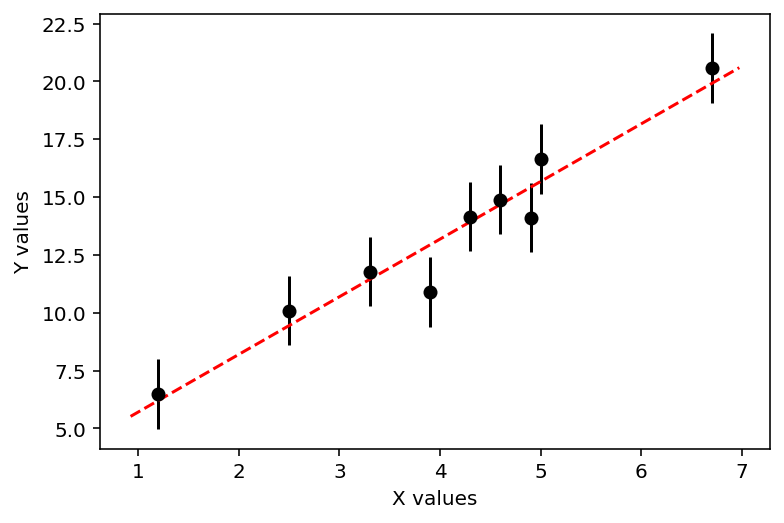

In [6]:
plt.errorbar(xvals,yvals,yerr=yerror,fmt='o',color='black')
plt.xlabel('X values')
plt.ylabel('Y values')
xfit = np.linspace(plt.xlim()[0],plt.xlim()[1],100)
yfit = intercept + slope*xfit
plt.plot(xfit,yfit,'r--')

Looks good. But what do the "off diagonal" elements in the covariance matrix actually mean?